In [5]:
!pip3 install pystac_client
!pip3 install odc.stac
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.7 MB/s eta 0:00:00a 0:00:01m


In [2]:
from pystac_client import Client
from odc.stac import load

Example: The bounding box of the New Zealand Exclusive Economic Zone in WGS 84 (from 160.6°E to 170°W and from 55.95°S to 25.89°S) would be represented in JSON as [160.6, -55.95, -170, -25.89] and in a query as bbox=160.6,-55.95,-170,-25.89.

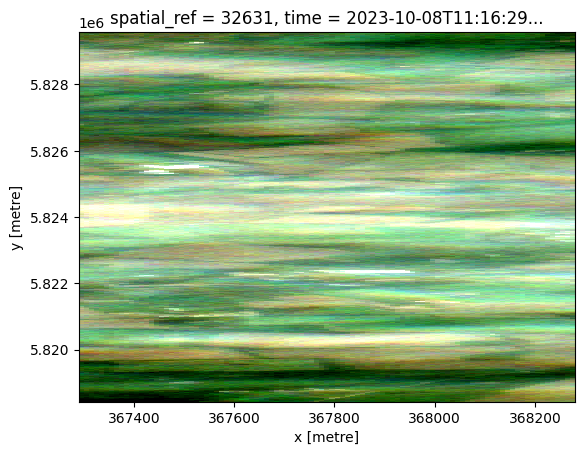

In [24]:
client = Client.open("https://earth-search.aws.element84.com/v1")
collection = "sentinel-2-l2a"
tas_bbox = [1.045, 52.5, 1.055, 52.6]
search = client.search(collections=[collection], bbox=tas_bbox, datetime="2023-10")

data = load(search.items(), bbox=tas_bbox, groupby="solar_day", chunks={})
data[["red", "green", "blue"]].isel(time=2).to_array().plot.imshow(robust=True)